# Preparing the DataSet

In [1]:
%pip install pandoc

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib
%pip install scikit-learn
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
seed=1234
np.random.seed(seed)

## Extract dataset from local storage

In [9]:
#set path to the directoy for the images
face_up_path = "./DataSet/FaceUp"
face_down_path = "./DataSet/FaceDown"


#label the data
face_up_data = list()
for img in os.listdir(face_up_path):
    photo = cv2.imread(os.path.join(face_up_path, img))
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    photo = cv2.resize(photo, (80,80))
    photo = np.array(photo)
    face_up_data.append([photo, 0])

face_down_data = list()

    
for img in os.listdir(face_down_path):
    photo = cv2.imread(os.path.join(face_down_path, img))
    photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    photo = cv2.resize(photo, (80,80))
    photo = np.array(photo)
    face_down_data.append([photo, 1])
    



training_data = face_up_data + face_down_data


print(len(training_data))
print(len(face_up_data))


42
29


In [10]:
#Convert list to numpy array
path = "./DataSet"

np.save(os.path.join(path, 'features'), np.array(training_data, dtype=object))


In [11]:
##reload them
saved = np.load(os.path.join(path, 'features.npy'), allow_pickle=True)

## Displaying a photo from the dataset

In [12]:
#Display the photo
print(np.shape(saved))
#print(saved[:,0])
data_rows = saved[:,0]
data_list = []
print(np.shape(saved[0]))

print(np.shape(saved[0][0]))
for row in range(len(saved)):
    saved[row][0] = np.reshape(saved[row][0], (80*80*3))


(42, 2)
(2,)
(80, 80, 3)


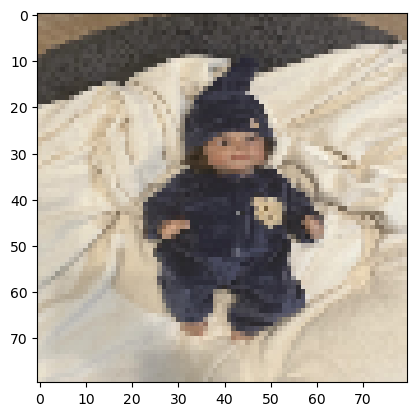

In [6]:
plt.imshow(np.array(training_data[0][0]))

## Viewing a mix of the dataset

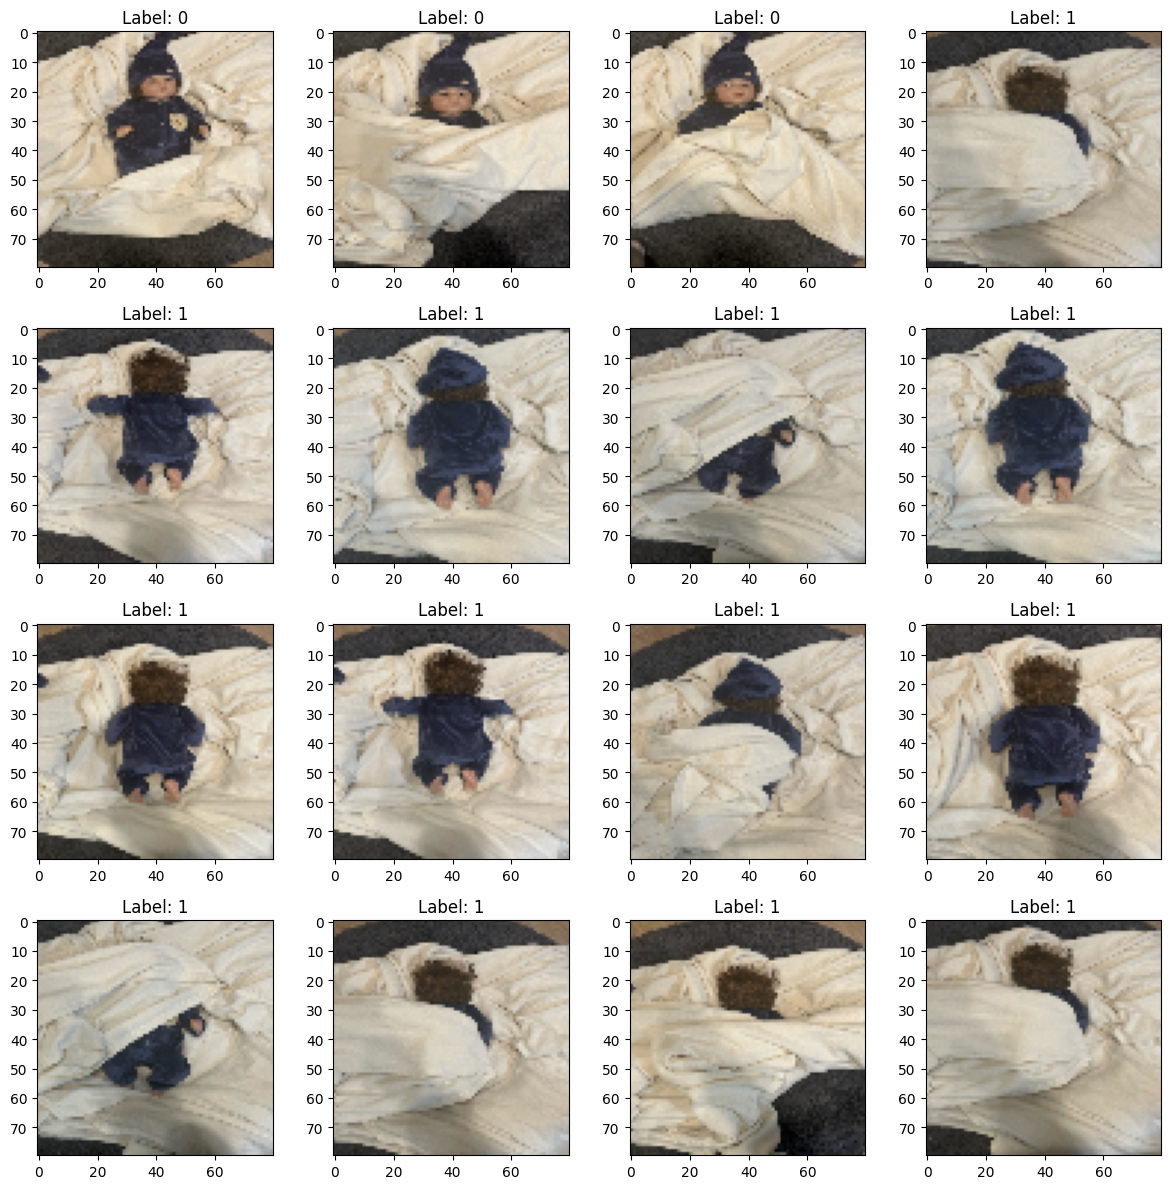

In [13]:
fig, axes = plt.subplots(4,4, figsize=(12,12))

img = 26
for row in range(4):
    for col in range(4):
        a = np.reshape(saved[img][0], (80,80,3))
        axes[row,col].imshow(a)
        axes[row,col].set_title("Label: " + str(saved[img][1]))
        img+=1

fig.tight_layout()

## We need to shuffle the dataset
Since we are just doing a quick exploration on this, there is no seed being used to enforce consistency in entropy.

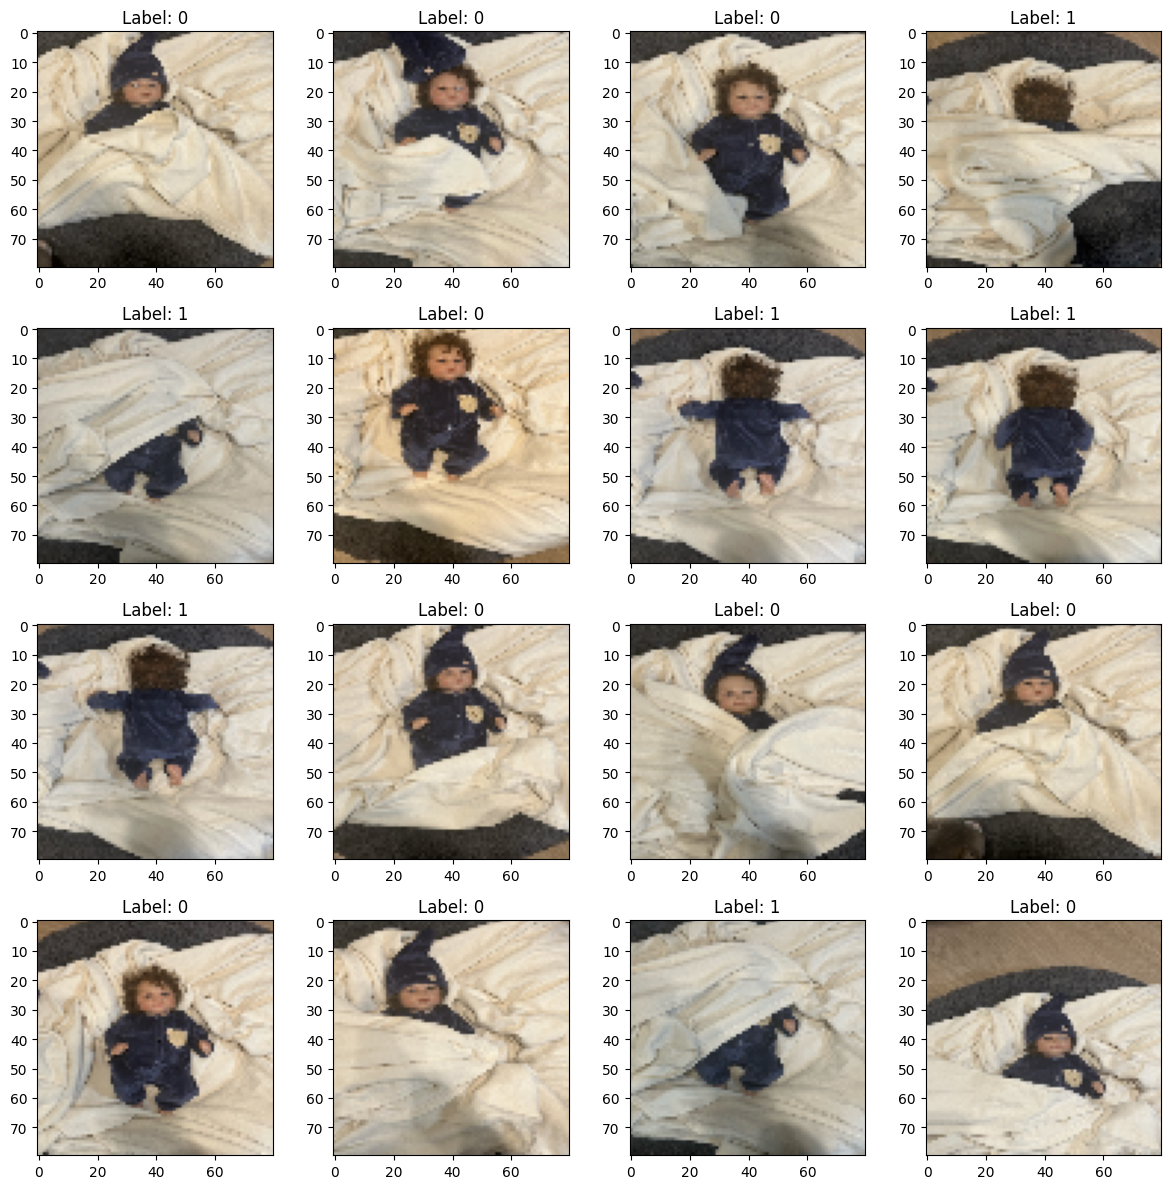

In [14]:
np.random.shuffle(saved)

fig, axes = plt.subplots(4,4, figsize=(12,12))

img = 26
for row in range(4):
    for col in range(4):
        a = np.reshape(saved[img][0], (80,80,3))
        axes[row,col].imshow(a)
        axes[row,col].set_title("Label: " + str(saved[img][1]))
        img+=1

fig.tight_layout()

## Quick exploration of some of pixel count via histograms

(19200,)
(19200,)
(42,)
[0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0
 0 0 0 1 0]


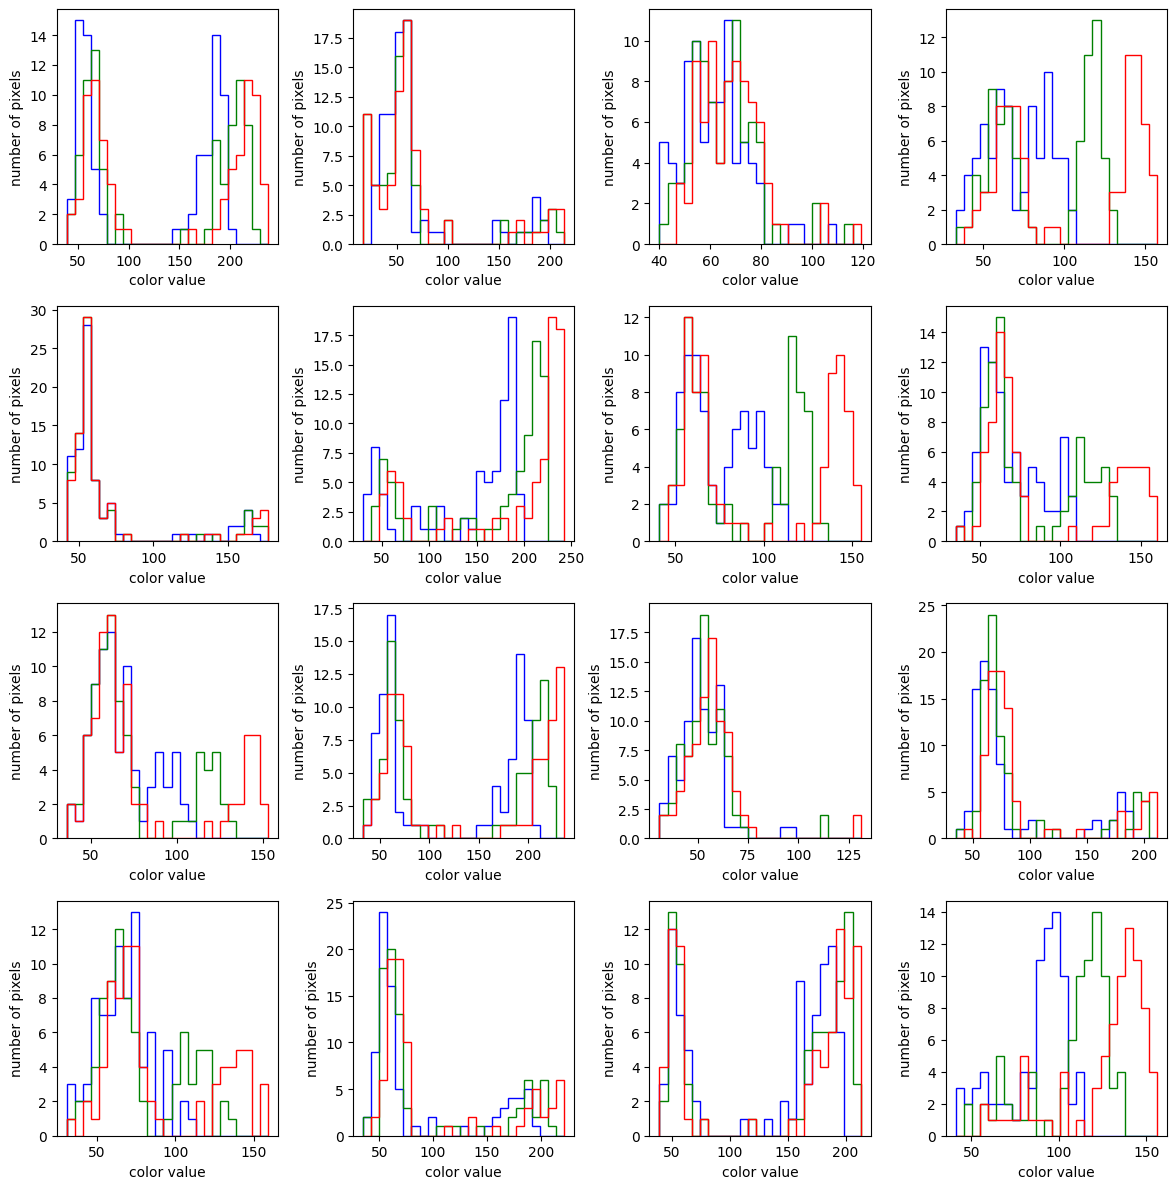

In [15]:
print(np.shape(saved[0][0]))
images = saved[:,0]
labels = saved[:,1]
print(np.shape(images[0]))
print(np.shape(labels))
print(labels)

img = 26
fig, axes = plt.subplots(4,4, figsize=(12,12))
for row in range(4):
    for col in range(4):
        axes[row,col].hist(np.reshape(images[img], (80,80,3))[0], bins = 25, color = ['r','g','b'], histtype = 'step')
      #  axes[row,col].hist(images[img], bins = 25, color = 'g', histtype = 'step')
       # axes[row,col].hist(images[img], bins = 25, color = 'b', histtype = 'step')
        axes[row,col].set_xlabel('color value')
        axes[row,col].set_ylabel('number of pixels')
        img += 1

fig.tight_layout()

## Setting up test and train datasets

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 21, 23, 24, 29]


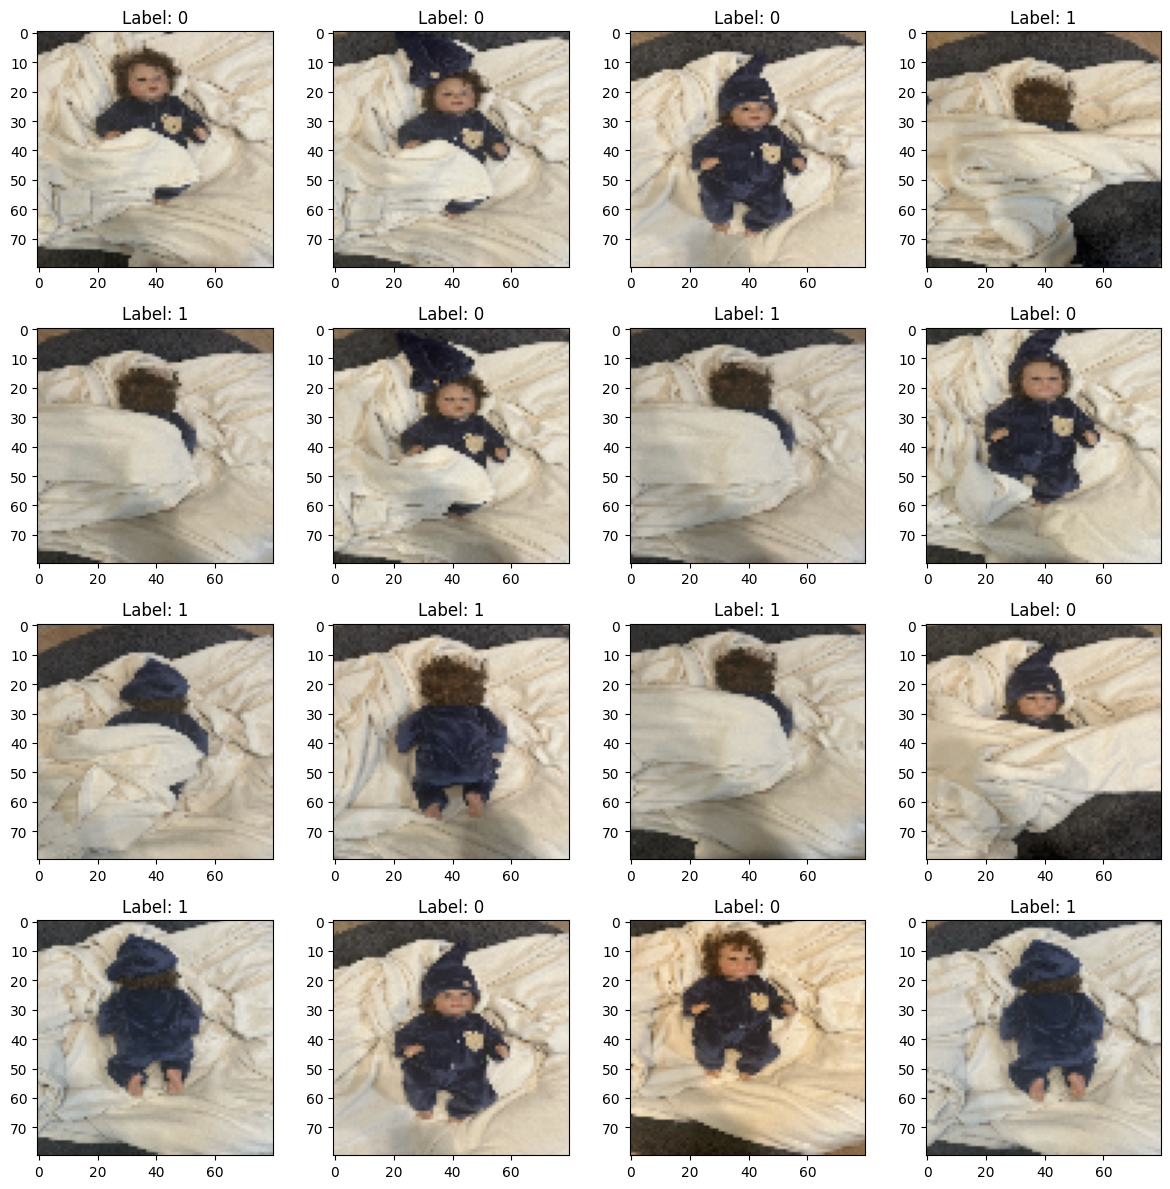

In [16]:

'''
Train on 8 with 0, 8 with 1
Test on 5 with 0, test on 5 with 1'''
i = 0
j = 0
ix = 0
training = []
indices = []
while (i<8) or (j<8):
    if i < 8 and saved[ix][1] == 0:
        training.append(saved[ix])
        indices.append(ix)
        i+=1
    if j < 8 and saved[ix][1] == 1:
        training.append(saved[ix])
        indices.append(ix)
        j+=1
    ix += 1
    
np.random.shuffle(training)  

fig, axes = plt.subplots(4,4, figsize=(12,12))

img = 0
for row in range(4):
    for col in range(4):
        a = np.reshape(training[img][0], (80,80,3))
        axes[row,col].imshow(a)
        axes[row,col].set_title("Label: " + str(training[img][1]))
        img+=1

fig.tight_layout()

print(indices)

In [17]:
test = np.delete(saved, indices, 0)
test_data = []
i = 0
j = 0
ix = 0
indices
while (i<5) or (j<5):
    if i < 5 and test[ix][1] == 0:
        test_data.append(test[ix])
        indices.append(ix)
        i+=1
    if j < 5 and test[ix][1] == 1:
        test_data.append(test[ix])
        indices.append(ix)
        j+=1
    ix += 1

    
training = np.array(training)
X_train = training[:,0]
print(np.shape(X_train))
Y_train = training[:,1]
test_data = np.array(test_data)
X_test = test_data[:,:2]
Y_test = test_data[:,1]


(16,)


In [18]:
print(np.shape(X_train))
data_list = []
for row in X_train:
    data_list.append(row)

X_train = np.array(data_list)

data_list = []
for row in Y_train:
    data_list.append(row)
    
Y_train = np.array(data_list)

data_list = []
for row in X_test:
    data_list.append(row[0])
    
X_test = np.array(data_list)


data_list = []
for row in Y_test:
    data_list.append(row)
    
Y_test = np.array(data_list)


(16,)


## Nearest Centroid Classifier

In [33]:
##Let's do NearestCentroid

from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

clf = NearestCentroid()

clf.fit(X_train, Y_train)

train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)

print("Train Error", 1-accuracy_score(Y_train, train_predict))
print("Test Error: ", 1-accuracy_score(Y_test, test_predict))



Train Error 0.125
Test Error:  0.30000000000000004


In [34]:
print(Y_train)
print(train_predict)

print(Y_test)
print(test_predict)


[0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1]
[0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1]
[0 0 0 0 0 1 1 1 1 1]
[0 0 1 0 1 1 1 1 1 0]


In [35]:
##Now I will save the model in Pickle
import pickle
filename = "nc_classifier.sav"
pickle.dump(clf, open(filename, 'wb'))

In [36]:
##Now I will try importing the model
loaded_nc_classifier = pickle.load(open(filename, 'rb'))
result = loaded_nc_classifier.score(X_test, Y_test)
print(result)

0.7


## Multilayer Perceptron

In [37]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier((124,16,8), activation='tanh', solver='adam')
mlp_clf.fit(X_train, Y_train)
train_predict = mlp_clf.predict(X_train)
test_predict = mlp_clf.predict(X_test)

print("Train Error", 1-accuracy_score(Y_train, train_predict))
print("Test Error: ", 1-accuracy_score(Y_test, test_predict))

filename = "mlp_classifier.sav"
pickle.dump(mlp_clf, open(filename, 'wb'))

Train Error 0.5
Test Error:  0.5


## Searching for some optimal hyperparameters in the number of layers and the learning rate

In [40]:
import pandas as pd
layers = [(128,64,32), (100,50,10), (64,32,8), (420, 210), (100, 100)]
lr = [.1, .09, 0.0005, 0.001, 0.005, 0.01]


names = { 'Layers' : layers,
            'Learning Rate' : lr}

df = pd.DataFrame()
df_test = pd.DataFrame()
col = []
col_test = []
for rate in lr:
    col.clear()
    col_test.clear()
    for layer in layers:
        clf = MLPClassifier(hidden_layer_sizes=layer, activation='relu', solver='sgd',
                                       learning_rate_init=rate, n_iter_no_change = 100,
                                       max_iter=200,random_state=seed)
        clf.fit(X_train, Y_train)
        pred = clf.predict(X_train)
        te_pred = clf.predict(X_test)
        col.append(accuracy_score(Y_train, pred))
        col_test.append(accuracy_score(Y_test, te_pred))
    df[str(rate)] = col
    df_test[str(rate)] = col_test

row_names = dict((i,str(j)) for i,j in enumerate(layers))
df.rename(index=row_names, inplace=True)
df_test.rename(index=row_names, inplace=True)
print("---Training Accuracy Table---")        
print(df)
print("---Testing Accuracy Table---")
print(df_test)


---Training Accuracy Table---
               0.1  0.09  0.0005  0.001  0.005  0.01
(128, 64, 32)  0.5   0.5     0.5    0.5    0.5   0.5
(100, 50, 10)  0.5   0.5     0.5    0.5    0.5   0.5
(64, 32, 8)    0.5   0.5     0.5    0.5    0.5   0.5
(420, 210)     0.5   0.5     0.5    0.5    0.5   0.5
(100, 100)     0.5   0.5     0.5    0.5    0.5   0.5
---Testing Accuracy Table---
               0.1  0.09  0.0005  0.001  0.005  0.01
(128, 64, 32)  0.3   0.3     0.5    0.5    0.5   0.5
(100, 50, 10)  0.5   0.5     0.5    0.5    0.5   0.5
(64, 32, 8)    0.5   0.5     0.5    0.5    0.4   0.4
(420, 210)     0.5   0.5     0.5    0.6    0.6   0.6
(100, 100)     0.3   0.3     0.5    0.2    0.5   0.5


## Confusion Matrix to display Nearest Centroid accuracy

Sklearn Results:
--- Accuracy (train): 0.875
--- Accuracy (test): 0.7


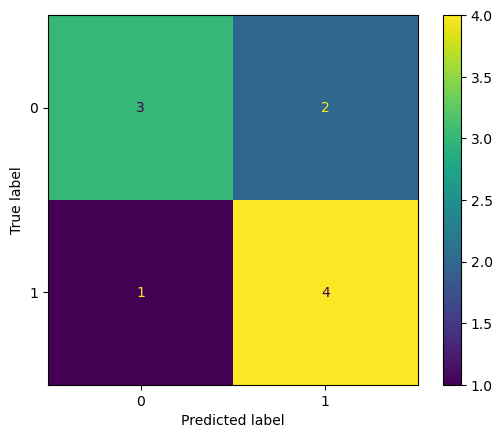

In [48]:
    sklearn_nearest_centroid = NearestCentroid()

    # Fit on training dataset
    sklearn_nearest_centroid.fit(X_train, Y_train)

    # Make predictions on training and testing data
    sklearn_y_pred_tr = sklearn_nearest_centroid.predict(X_train)
    sklearn_y_pred_te = sklearn_nearest_centroid.predict(X_test)

    # Evaluate accuracies using the sklearn function accuracy_score
    sklearn_acc_tr = accuracy_score(Y_train, sklearn_y_pred_tr)
    sklearn_acc_te = accuracy_score(Y_test, sklearn_y_pred_te)

    print(f'Sklearn Results:')
    print(f'--- Accuracy (train): {sklearn_acc_tr}')
    print(f'--- Accuracy (test): {sklearn_acc_te}')

    # Evaluate confusion matrix using the sklearn function confusion_matrix
    sklearn_cm = confusion_matrix(Y_test, sklearn_y_pred_te)
    sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
    sklearn_disp.plot();
    

## Confusion Matrix to display MLP Accuracy

Sklearn Results:
--- Accuracy (train): 0.5625
--- Accuracy (test): 0.5


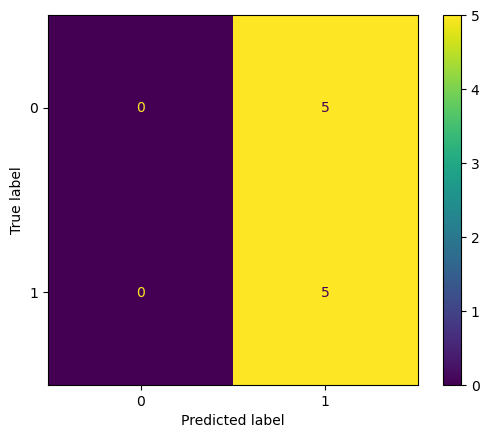

In [50]:
mlp_clf = MLPClassifier((124,16,8), activation='tanh', solver='adam', random_state=seed)
mlp_clf.fit(X_train, Y_train)
train_predict = mlp_clf.predict(X_train)
test_predict = mlp_clf.predict(X_test)


    # Evaluate accuracies using the sklearn function accuracy_score
sklearn_acc_tr = accuracy_score(Y_train, train_predict)
sklearn_acc_te = accuracy_score(Y_test, test_predict)

print(f'Sklearn Results:')
print(f'--- Accuracy (train): {sklearn_acc_tr}')
print(f'--- Accuracy (test): {sklearn_acc_te}')

    # Evaluate confusion matrix using the sklearn function confusion_matrix
sklearn_cm = confusion_matrix(Y_test, test_predict)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();
    